In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc

from sys import path
from os.path import abspath
from os import makedirs
path.append(abspath("/home/ng136/nico"))
import ng_functions as ng

from glob import glob
from pathlib import Path
import warnings
from time import time
from datetime import datetime
from tqdm import tqdm
import gseapy
import json

# Load data and metadata

In [2]:
n_states = ['N1a', 'N1b', 'N2', 'N3', 'N4', 'N5', 'N6']

In [3]:
n_states_dict = {'N1a' : 'Sell+Ngp+ neutrophils',
                 'N1b' : 'Sell+Lst1+ neutrophils',
                 'N2' : 'Sell+Cxcl10+ neutrophils',
                 'N3' : 'Cxcl3+ neutrophils',
                 'N4' : 'Siglecf+Xbp1+ neutrophils',
                 'N5' : 'Siglecf+Ccl3+ neutrophils',
                 'N6' : 'Siglecf+Ngp+ neutrophils'}

neu_palette_dict = {'Sell+Ngp+ neutrophils': '#6EA6CD',
                    'Sell+Lst1+ neutrophils': '#4A7BB7',
                    'Sell+Cxcl10+ neutrophils': '#364B9A',
                    'Cxcl3+ neutrophils': '#EAECCC',
                    'Siglecf+Xbp1+ neutrophils': '#A50026',
                    'Siglecf+Ccl3+ neutrophils': '#DD3D2D',
                    'Siglecf+Ngp+ neutrophils': '#F67E4B'}

# Load scRNA-seq

In [4]:
ndata = sc.read('/n/groups/klein/nico/neutrophils/backups/totalseq_exp2_neutrophils_untreated_annotated_embedding_5258x13126_backup_220422_15h46.h5ad')
tdata = sc.read('/n/groups/klein/nico/neutrophils/backups/totalseq_exp3_neutrophils_acd40_annotated_embedding_25210x17824_backup_220422_15h46.h5ad')

hdata = ndata[ndata.obs.sample_condition.str.startswith('WT')].copy()
udata = ndata[ndata.obs.sample_condition.str.startswith('KP19')].copy()

# Load surface expression data

In [5]:
ndata_adt = sc.read('/n/groups/klein/nico/neutrophils/backups/totalseq_exp2_neutrophils_untreated_adt_clr_no_cd101_3978x20_backup_220601_04h57.h5ad')
tdata_adt = sc.read('/n/groups/klein/nico/neutrophils/backups/totalseq_exp3_neutrophils_treated_adt_clr_25210x20_backup_220601_05h05.h5ad')

hdata_adt = ndata[ndata.obs.sample_condition.str.startswith('WT')].copy()
udata_adt = ndata[ndata.obs.sample_condition.str.startswith('KP19')].copy()

# Plot

[<Figure size 3622.5x600 with 10 Axes>]

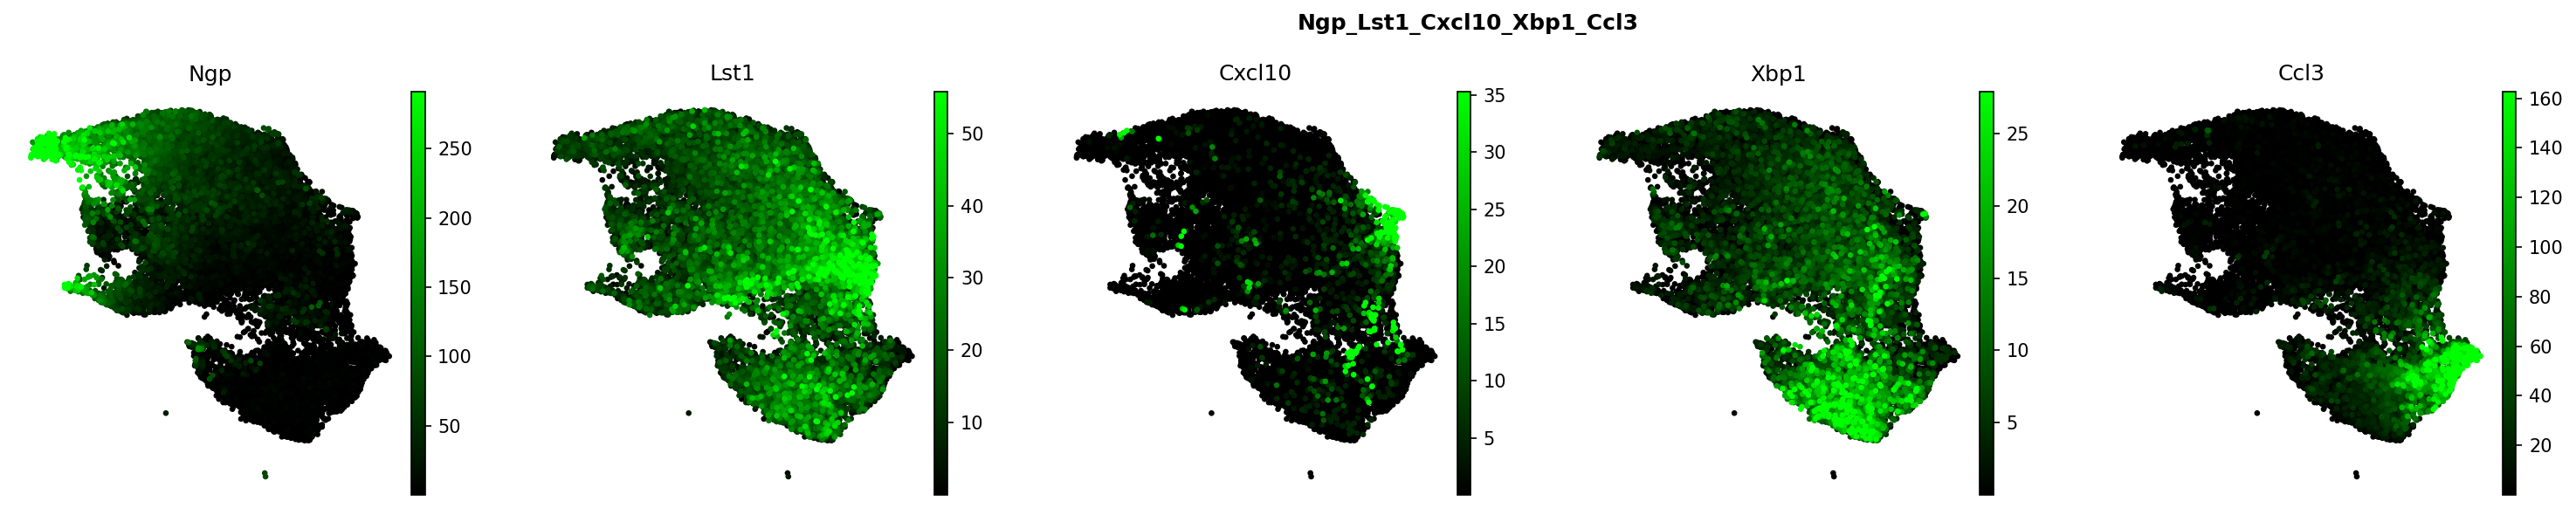

In [6]:
ng.umap_plot(tdata, ['Ngp', 'Lst1', 'Cxcl10', 'Xbp1', 'Ccl3'], vmax='p99.5', cmap=ng.spring_cmap, s=40, frameon=False, layer='cp10k', ncols=5)

[<Figure size 1449x600 with 4 Axes>]

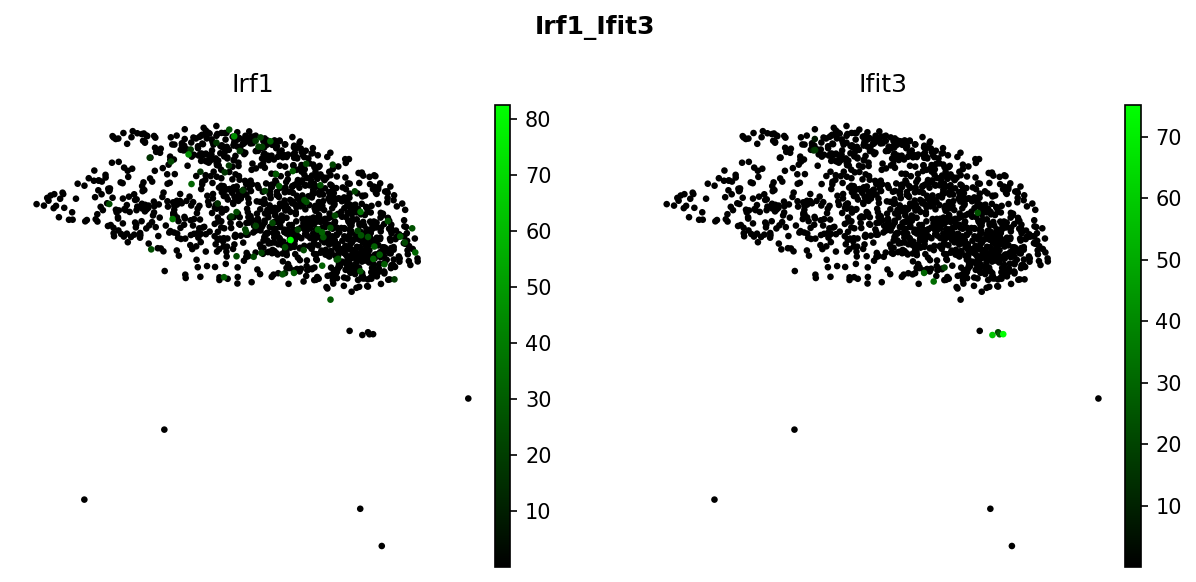

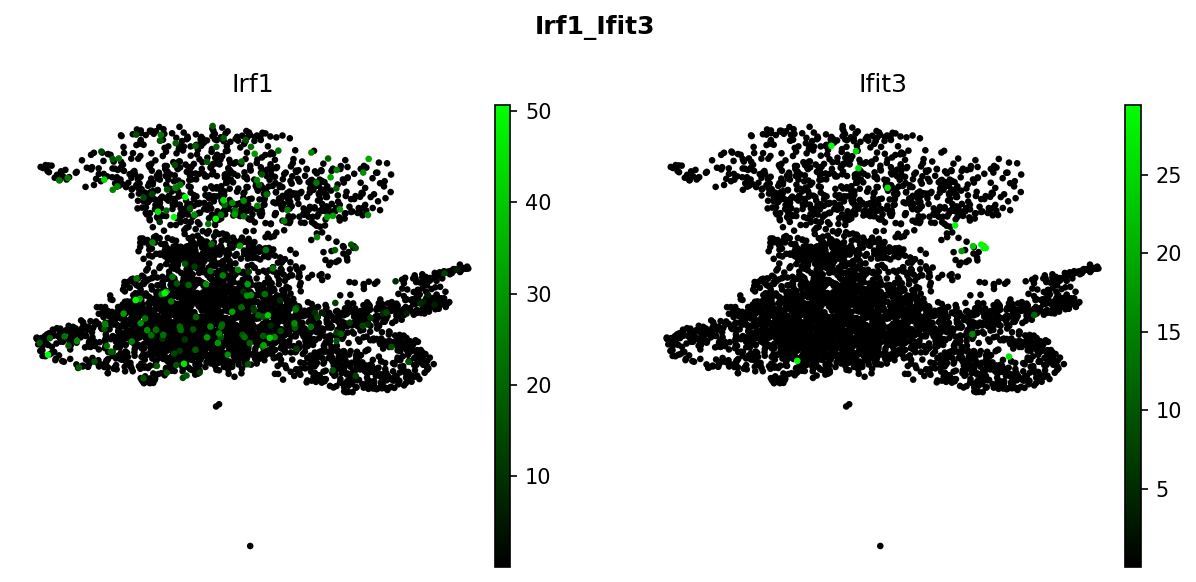

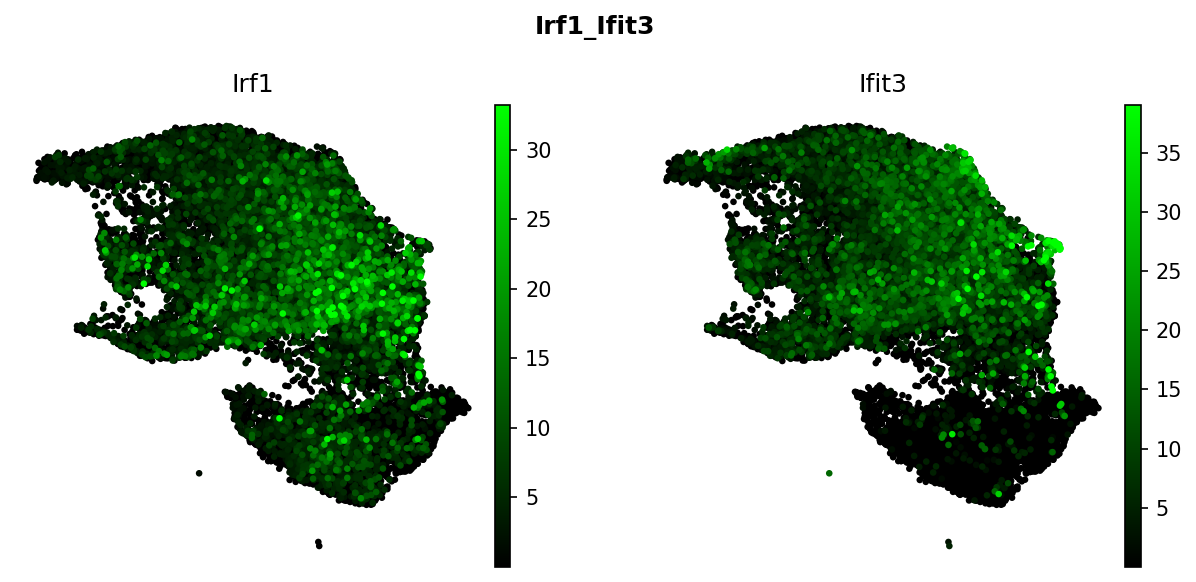

In [7]:
ng.umap_plot(hdata, ['Irf1', 'Ifit3'], vmax='p99.99', cmap=ng.spring_cmap, s=40, frameon=False, layer='cp10k')
ng.umap_plot(udata, ['Irf1', 'Ifit3'], vmax='p99.9', cmap=ng.spring_cmap, s=40, frameon=False, layer='cp10k')
ng.umap_plot(tdata, ['Irf1', 'Ifit3'], vmax='p99.9', cmap=ng.spring_cmap, s=40, frameon=False, layer='cp10k')

[<Figure size 2898x600 with 8 Axes>]

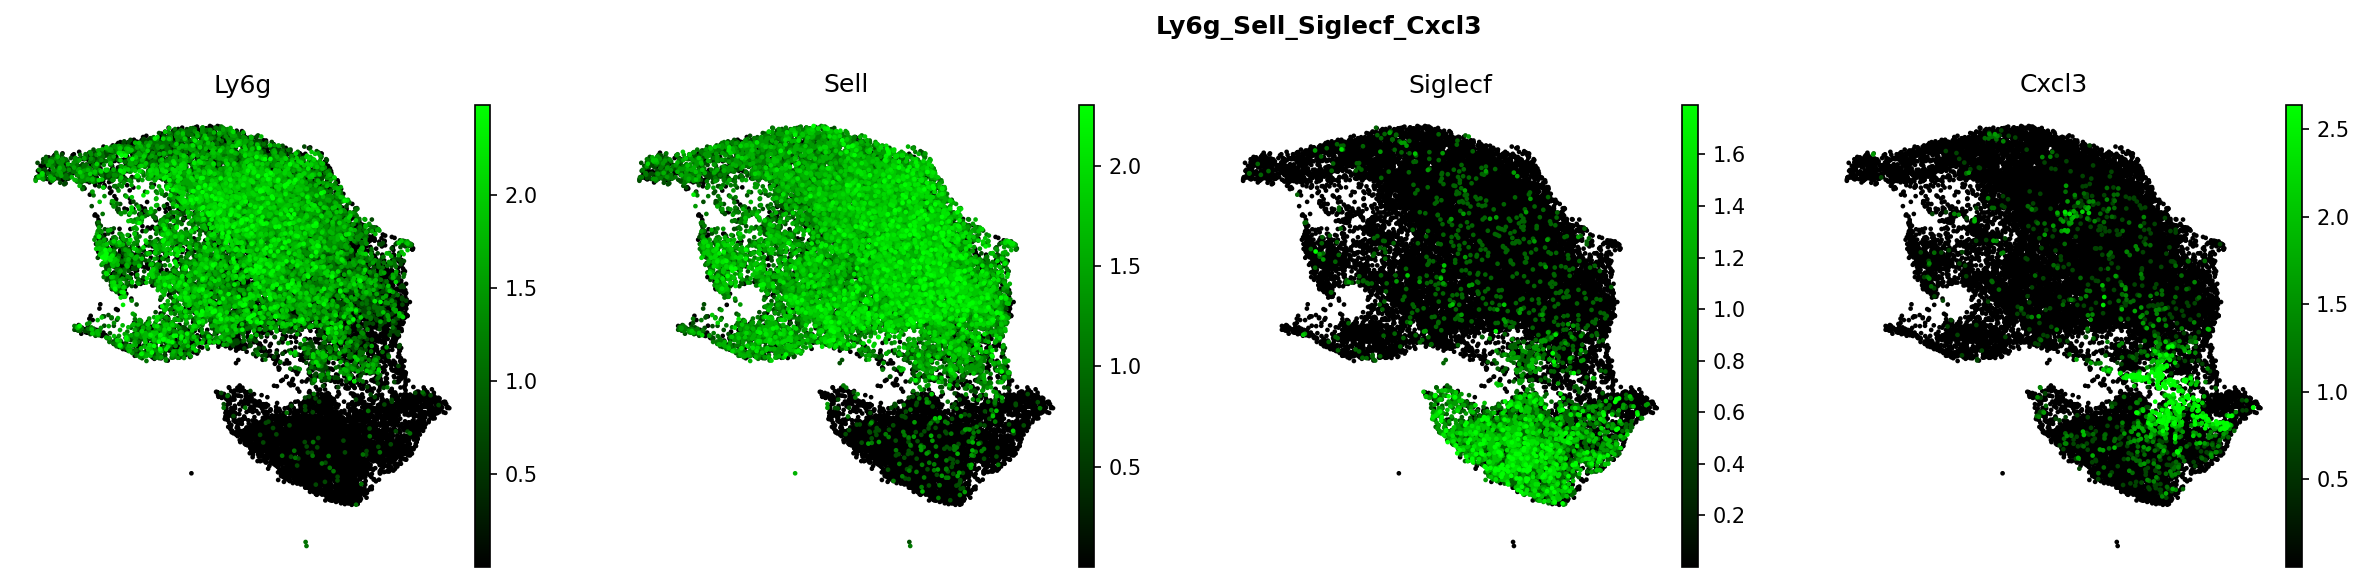

In [8]:
ng.umap_plot(tdata, ['Ly6g', 'Sell', 'Siglecf', 'Cxcl3'], vmax='p99.5', cmap=ng.spring_cmap, s=20, frameon=False, layer='sct_log1p')

[<Figure size 2173.5x600 with 6 Axes>]

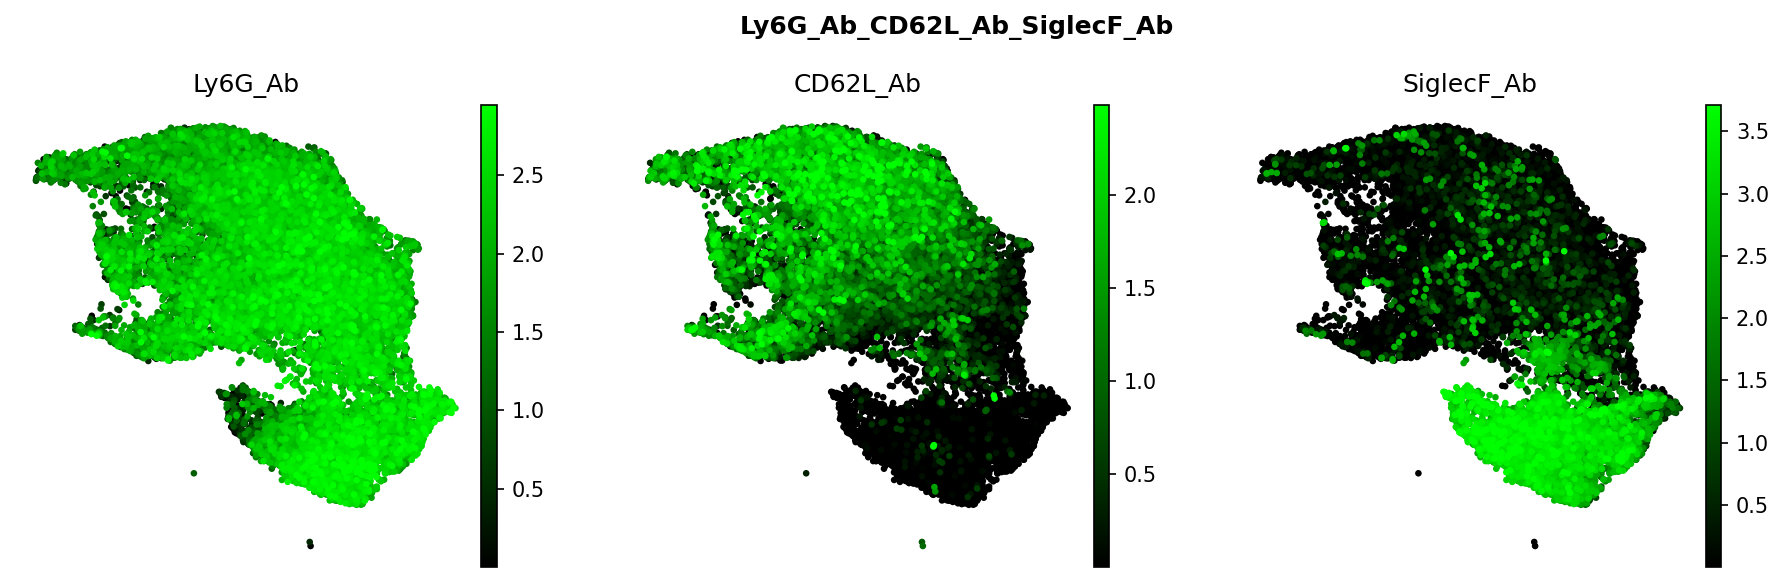

In [9]:
ng.umap_plot(tdata_adt, ['Ly6G_Ab', 'CD62L_Ab', 'SiglecF_Ab'], vmax='p99.5', cmap=ng.spring_cmap, s=40, frameon=False, layer='clr')

[<Figure size 3622.5x600 with 10 Axes>]

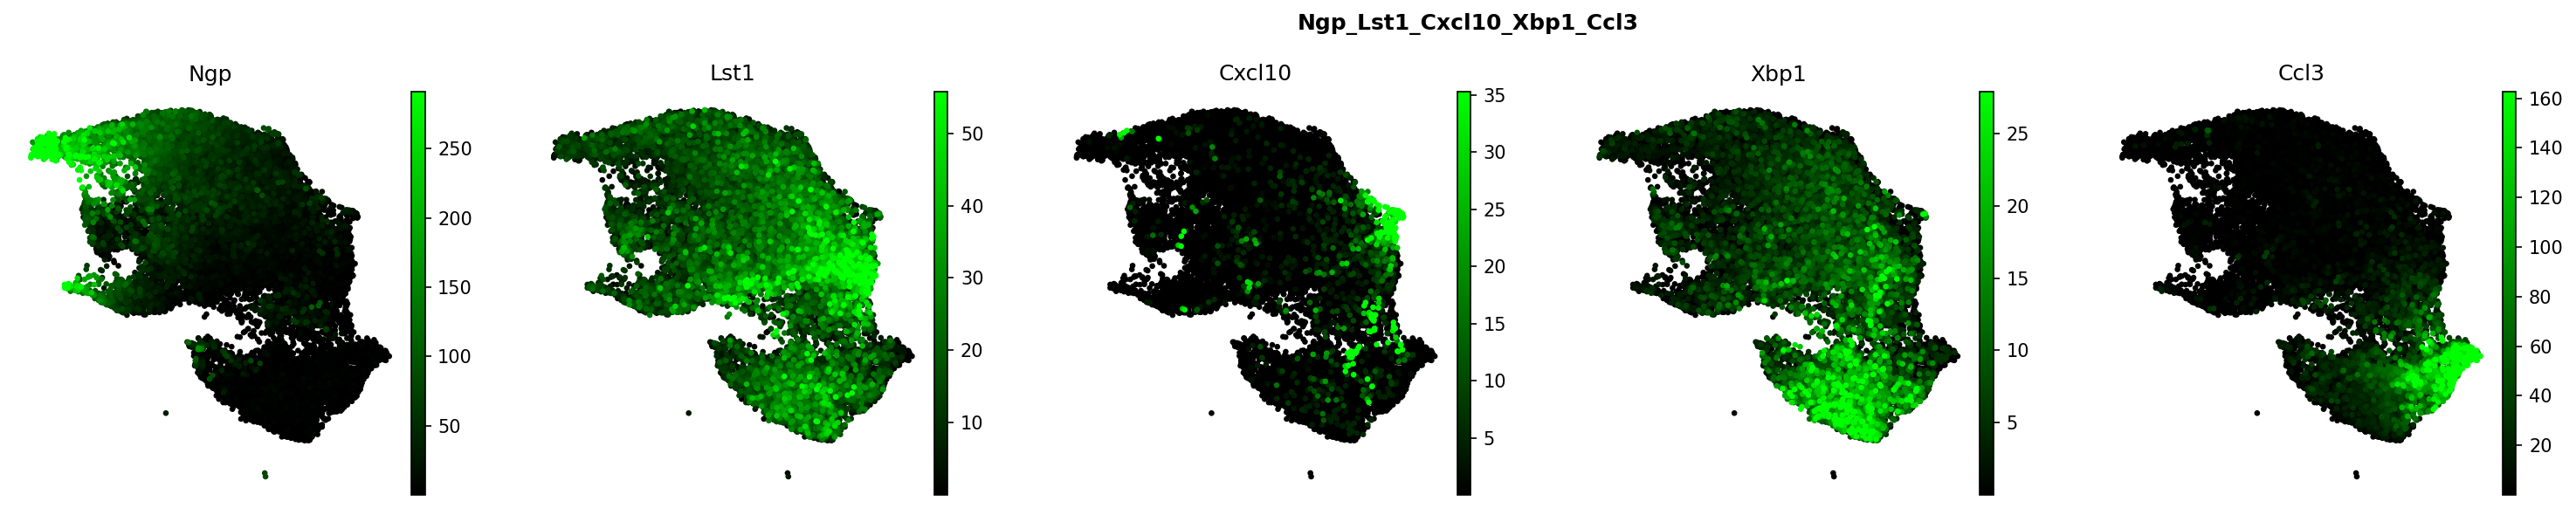

In [10]:
ng.umap_plot(tdata, ['Ngp', 'Lst1', 'Cxcl10', 'Xbp1', 'Ccl3'], vmax='p99.5', cmap=ng.spring_cmap, s=40, frameon=False, layer='cp10k', ncols=5)